In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


##ライブラリのインポート

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as st
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##データのインポート

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/train.csv',index_col=[0])

In [ ]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


##EDA

###相関関係

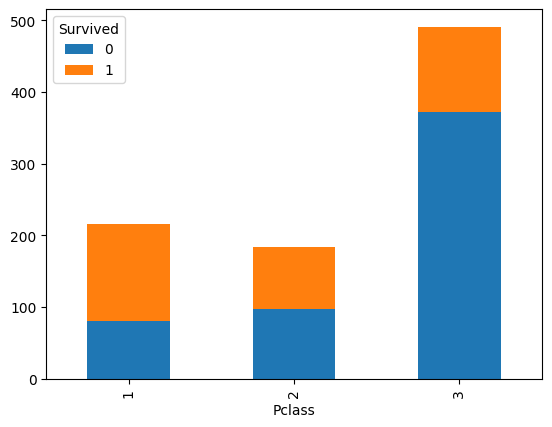

In [ ]:
#survivedとpclass
cross_pclass = pd.crosstab(df_train['Survived'], df_train['Pclass'])
cross_pclass.T.plot(kind='bar', stacked=True)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

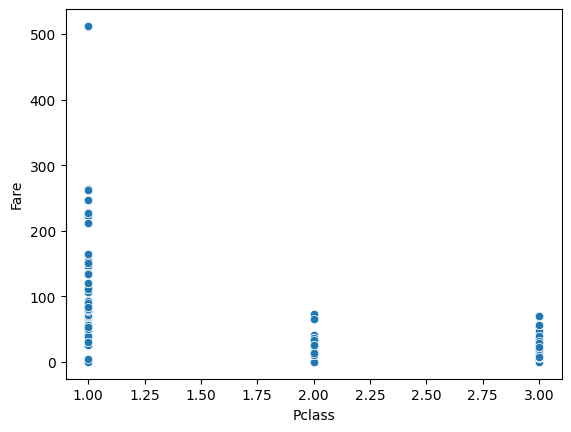

In [ ]:
#pclassとfare
sns.scatterplot(x='Pclass',y='Fare',data=df_train)

pcalss=1かつfare=0を最頻値？か何かで埋める
また、fareの外れ値はdropする

In [ ]:
pc1 = df_train[df_train['Pclass']==1]
pc1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


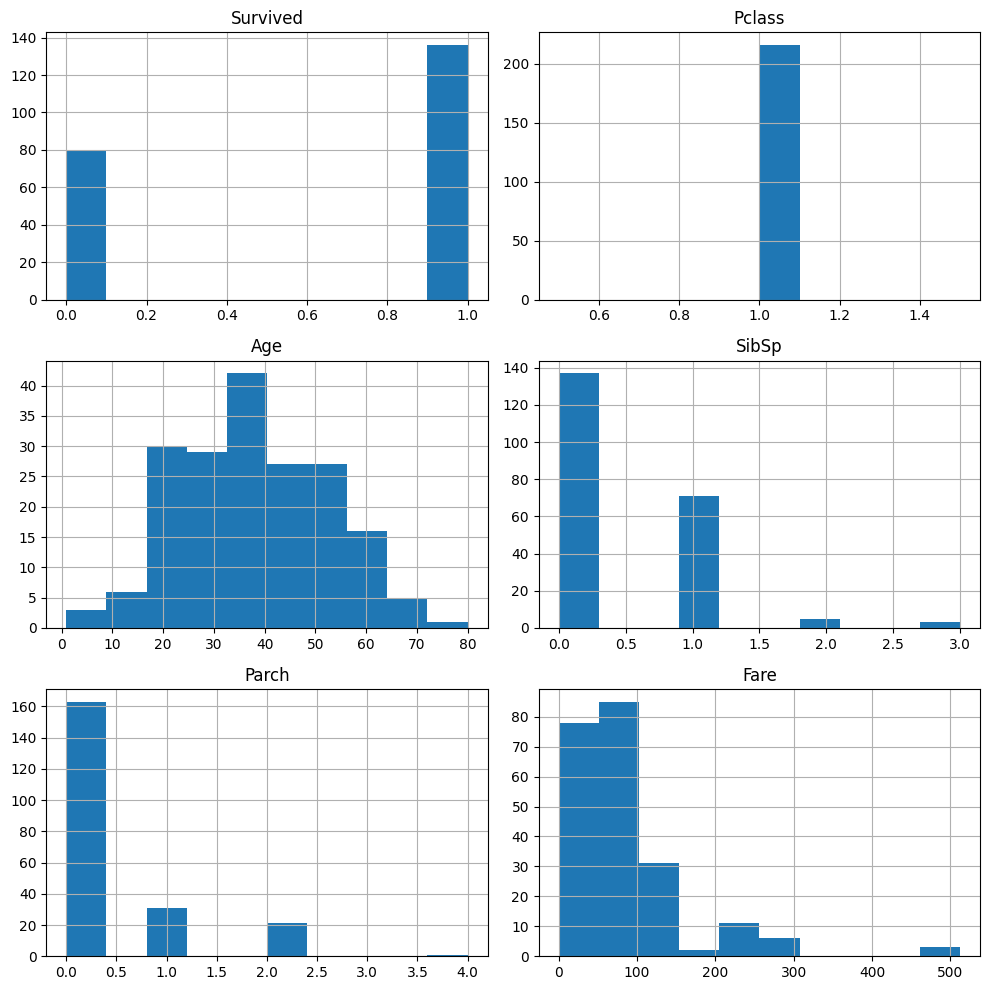

In [ ]:
pc1.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

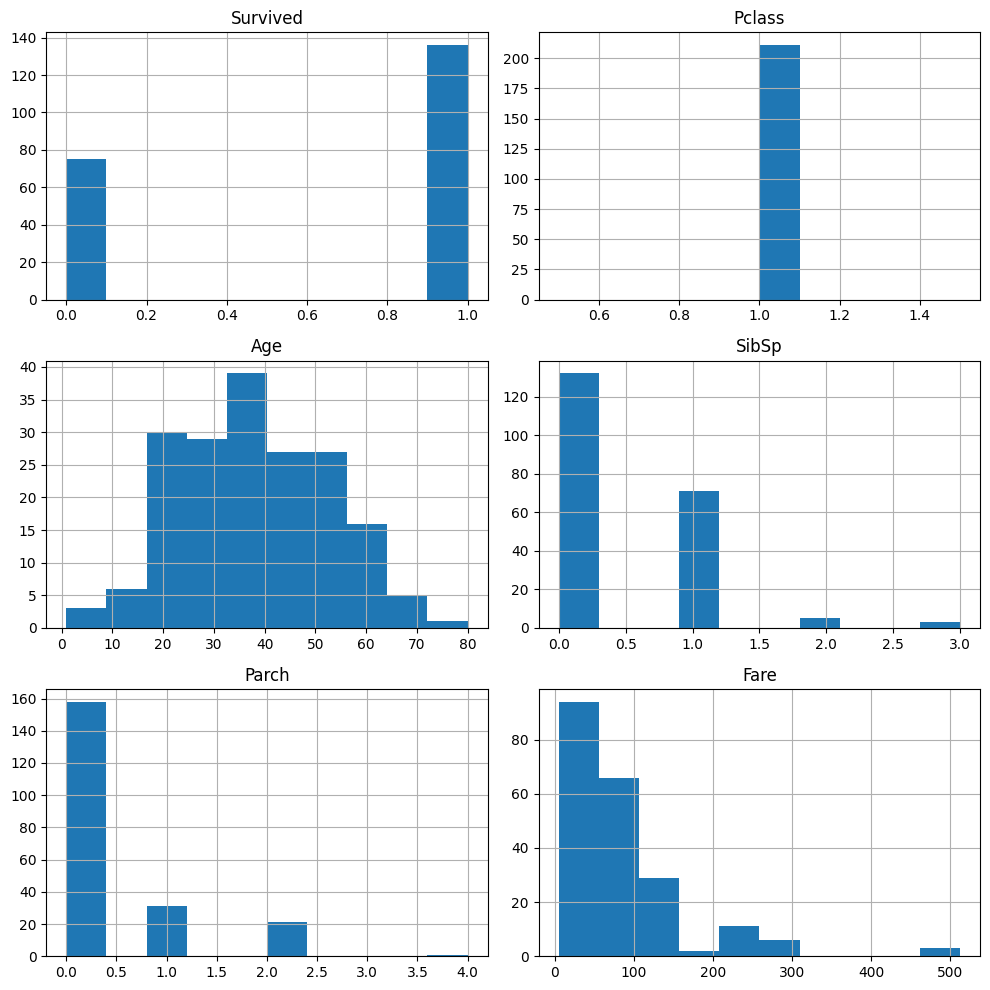

26.55

In [ ]:
pc1_2 = pc1[pc1["Fare"]!= 0]
pc1_2.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

st.mode(pc1_2.Fare)

In [ ]:
#Pclass = 1でFare=0に最頻値を代入
df_train.loc[(df_train['Pclass']==1)&(df_train['Fare']==0),"Fare"]=26.55
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
#Ageはクラスごとの最頻値で埋める
pc2 = df_train[df_train['Pclass']==2]
pc3 = df_train[df_train['Pclass']==3]


22.0

In [ ]:
df_train[['Fare']].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [ ]:
st.mode(pc2.Age)

34.0

In [ ]:
st.mode(pc3.Age)

22.0

In [ ]:
st.mode(pc1.Age)

35.0

####一人か家族で乗ってるか

In [ ]:
df_ftrain = df_train

#単身旅行者と団体旅行者の特徴量を新しく作成
df_ftrain['Family_group'] = df_ftrain.SibSp + df_ftrain.Parch
df_ftrain

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_group,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,3


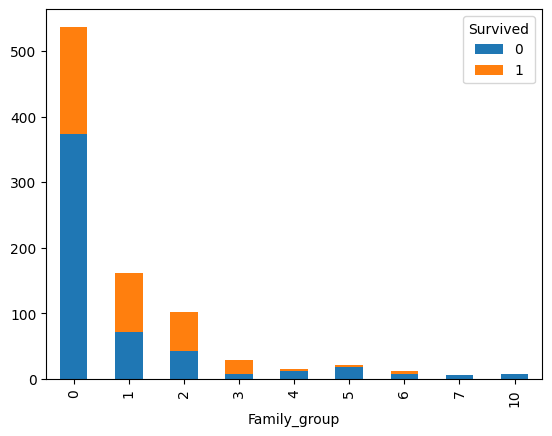

In [ ]:
cross_family = pd.crosstab(df_ftrain['Survived'], df_train['Family_group'])
cross_family.T.plot(kind='bar', stacked=True)
plt.show()

一人で乗ってるより家族で乗ってる方が助かりそう

##前処理

In [ ]:
#Fareの外れ値を消す
q= df_train.Fare.max()
df_train = df_train[df_train['Fare'] < q]
df_train.max()

<ipython-input-74-34f26e52e719>:4: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.max()


Survived                                  1
Pclass                                    3
Name            van Melkebeke, Mr. Philemon
Sex                                    male
Age                                    80.0
SibSp                                     8
Parch                                     6
Ticket                            WE/P 5735
Fare                                  263.0
Family_group                             10
Family                                   10
dtype: object

In [ ]:
#トレインデータ
# X, yを作成
X = df_train.drop('Survived',axis=1)
Y = df_train['Survived']
columns = X.columns

In [ ]:
# 説明変数を減らす
X = X.drop('Name',axis=1)
X = X.drop('Ticket',axis=1)
X = X.drop('Cabin',axis=1)
X= X.drop('Family_group', axis=1)

In [ ]:
#Family_group追加
X['Family'] = X.SibSp + X.Parch
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,1
2,1,female,38.0,1,0,71.2833,C,1
3,3,female,26.0,0,0,7.9250,S,0
4,1,female,35.0,1,0,53.1000,S,1
5,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,S,0
888,1,female,19.0,0,0,30.0000,S,0
889,3,female,NaN,1,2,23.4500,S,3


In [ ]:
#Pclass = 1でFare=0に最頻値26.55を代入
q=st.mode(pc1_2.Fare)
X.loc[(X['Pclass']==1)&(X['Fare']==0),"Fare"]=q
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,1
2,1,female,38.0,1,0,71.2833,C,1
3,3,female,26.0,0,0,7.9250,S,0
4,1,female,35.0,1,0,53.1000,S,1
5,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,S,0
888,1,female,19.0,0,0,30.0000,S,0
889,3,female,NaN,1,2,23.4500,S,3


In [ ]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Family        0
dtype: int64

In [ ]:
# embarkedは最頻値：S
X = X.fillna({'Embarked':X['Embarked'].mode()[0]})

In [ ]:
# ageはクラスの最頻値で補完
a  = st.mode(pc1.Age)
b = st.mode(pc2.Age)
c = st.mode(pc3.Age)
X[X['Pclass']==1]=X[X['Pclass']==1].fillna({'Age':a})
X[X['Pclass']==2]=X[X['Pclass']==2].fillna({'Age':b})
X[X['Pclass']==3]=X[X['Pclass']==3].fillna({'Age':c})
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Family      0
dtype: int64

In [ ]:
#Ageを正規化する
def normalization(df, name):
    # 正規化(不偏分散)
    df[name] = (df[name] - df[name].mean()) / df[name].std()

normalization(X, "Age")
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
PassengerId,,,,,,,,
1,3,male,-0.503481,1,0,7.2500,S,1
2,1,female,0.692915,1,0,71.2833,C,1
3,3,female,-0.204382,0,0,7.9250,S,0
4,1,female,0.468591,1,0,53.1000,S,1
5,3,male,0.468591,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
887,2,male,-0.129607,0,0,13.0000,S,0
888,1,female,-0.727805,0,0,30.0000,S,0
889,3,female,-0.503481,1,2,23.4500,S,3


In [ ]:
#Familyをダミー変数に変換（0 or 1以上）
X['Family'] = np.where(X['Family'] >= 1, 1, 0)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
PassengerId,,,,,,,,
1,3,male,-0.503481,1,0,7.2500,S,1
2,1,female,0.692915,1,0,71.2833,C,1
3,3,female,-0.204382,0,0,7.9250,S,0
4,1,female,0.468591,1,0,53.1000,S,1
5,3,male,0.468591,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
887,2,male,-0.129607,0,0,13.0000,S,0
888,1,female,-0.727805,0,0,30.0000,S,0
889,3,female,-0.503481,1,2,23.4500,S,1


In [ ]:
# One-hotエンコーディング
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,3,-0.503481,1,0,7.2500,1,1,0,1
2,1,0.692915,1,0,71.2833,1,0,0,0
3,3,-0.204382,0,0,7.9250,0,0,0,1
4,1,0.468591,1,0,53.1000,1,0,0,1
5,3,0.468591,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...
887,2,-0.129607,0,0,13.0000,0,1,0,1
888,1,-0.727805,0,0,30.0000,0,0,0,1
889,3,-0.503481,1,2,23.4500,1,0,0,1


Fare, Ageの標準化
pclass one-hot encording

##ロジスティック回帰

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8067632850241546
0.8052434456928839


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_test_predict = model.predict(X_train)
y_test_predict

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##Kaggleへ投稿

###前処理

In [ ]:
df_test_origin = pd.read_csv('/content/drive/My Drive/test.csv')
df_test=pd.read_csv('/content/drive/My Drive/test.csv',index_col=[0])

In [ ]:
#説明変数を減らす
df_test = df_test.drop('Name',axis=1)
df_test = df_test.drop('Ticket',axis=1)
df_test = df_test.drop('Cabin',axis=1)

In [ ]:
#説明Family作成
df_test['Family']= df_test.SibSp + df_test.Parch

In [ ]:
#Pclass = 1でFare=0に最頻値を代入
q=st.mode(df_test[df_test['Pclass']==1].Fare)
df_test.loc[(df_test['Pclass']==1)&(df_test['Fare']==0),"Fare"]=q

#Fareの欠損値を最頻値で代入
df_test = df_test.fillna({'Fare':df_test['Fare'].mode()[0]})


In [ ]:
# ageはクラスの最頻値で補完
a = st.mode(df_test[df_test['Pclass']==1].Age)
b = st.mode(df_test[df_test['Pclass']==2].Age)
c = st.mode(df_test[df_test['Pclass']==3].Age)
df_test[df_test['Pclass']==1]=df_test[df_test['Pclass']==1].fillna({'Age':a})
df_test[df_test['Pclass']==2]=df_test[df_test['Pclass']==2].fillna({'Age':b})
df_test[df_test['Pclass']==3]=df_test[df_test['Pclass']==3].fillna({'Age':c})


In [ ]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Family      0
dtype: int64

In [ ]:
#年齢を正規化
normalization(df_test, "Age")

In [ ]:
#Familyをダミー変数に変換（0 or 1以上）
df_test['Family'] = np.where(df_test['Family'] >= 1, 1, 0)

In [ ]:
# One-hotエンコーディング
df_test = pd.get_dummies(df_test, drop_first=True)

In [ ]:
df_test

,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
892,3,0.387728,0,0,7.8292,0,1,1,0
893,3,1.302967,1,0,7.0000,1,0,0,1
894,2,2.401253,0,0,9.6875,0,1,1,0
895,3,-0.161415,0,0,8.6625,0,1,0,1
896,3,-0.527510,1,1,12.2875,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1305,3,-0.600729,0,0,8.0500,0,1,0,1
1306,1,0.717214,0,0,108.9000,0,0,0,0
1307,3,0.680605,0,0,7.2500,0,1,0,1


###モデルへ

In [ ]:
df_test_predict = model.predict(df_test)
df_test_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#結果をCSVに変換
PassengerId = np.array(df_test_origin["PassengerId"]).astype(int)
leaf_data_test = pd.DataFrame({
    "PassengerId": PassengerId,
    "Survived": df_test_predict
})
leaf_data_test.to_csv('titanic_20230525.csv', index = False) 